In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 56.4 MB/s 
     |████████████████████████████████| 448 kB 32.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/ko_classification/' # 같은 경로로 저장 추천

In [ ]:
import tensorflow as tf
import keras
import gensim # 자연어 처리
import sklearn # 머신러닝
import nltk # 자연어 처리
import konlpy # 한국어 자연어 처리
import pandas as pd # 데이터 처리
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# **데이터 불러오기**

```
# 코드로 형식 지정됨
```



In [ ]:
df_train = pd.read_csv(PATH + "1. 실습용자료.txt", sep='|', encoding='cp949')
df_test = pd.read_csv(PATH + "2. 모델개발용자료.txt", sep='|', encoding='cp949')

In [ ]:
print("train의 타입:", type(df_train), "train의 길이:", len(df_train)) # 1백만 개
print("test의 타입:", type(df_test), "test의 길이:", len(df_test)) # 1십만 개

train의 타입: <class 'pandas.core.frame.DataFrame'> train의 길이: 1000000
test의 타입: <class 'pandas.core.frame.DataFrame'> test의 길이: 100000


In [ ]:
df_train.head(5)

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
1,id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
2,id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
3,id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
4,id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육


In [ ]:
df_test.head(5)

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_000001,NaN,NaN,NaN,치킨전문점에서,고객의주문에의해,치킨판매
1,id_000002,NaN,NaN,NaN,산업공구,다른 소매업자에게,철물 수공구
2,id_000003,NaN,NaN,NaN,절에서,신도을 대상으로,불교단체운영
3,id_000004,NaN,NaN,NaN,영업장에서,고객요구로,자동차튜닝
4,id_000005,NaN,NaN,NaN,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공"


# **데이터 전처리**

## **결측값 다루기**

In [ ]:
# 결측값을 ""으로 치환하여 합쳐봄.
df_train = df_train.fillna(" ")

In [ ]:
# 사용하지 않는 열 삭제
del df_train['AI_id']
del df_test['AI_id']

In [ ]:
# 열 추가
df_train['text'] = df_train['text_obj'] + df_train['text_mthd'] + df_train['text_deal']

In [ ]:
# 결측값 확인
print(df_train.isnull().sum()) # 결측치 없음

digit_1      0
digit_2      0
digit_3      0
text_obj     0
text_mthd    0
text_deal    0
text         0
dtype: int64


In [ ]:
df_train.head(5)

,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text
0,S,95,952,카센터에서,자동차부분정비,타이어오일교환,카센터에서자동차부분정비타이어오일교환
1,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매,상점내에서일반인을 대상으로채소.과일판매
2,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매,절단하여사업체에도매공업용고무를가지고합성고무도매
3,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치,영업점에서일반소비자에게열쇠잠금장치
4,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육,어린이집보호자의 위탁을 받아취학전아동보육


## **digit_1, digit_2, digit_3열 살펴보기**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print('digit_1열의 유니크한 값 :',df_train['digit_1'].nunique())
print('digit_2열의 유니크한 값 :',df_train['digit_2'].nunique())
print('digit_3열의 유니크한 값 :',df_train['digit_3'].nunique())

digit_1열의 유니크한 값 : 19
digit_2열의 유니크한 값 : 74
digit_3열의 유니크한 값 : 225


In [ ]:
print(sorted(df_train['digit_1'].unique()))
print(sorted(df_train['digit_2'].unique()))
print(sorted(df_train['digit_3'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']
[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 45, 46, 47, 49, 50, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 70, 71, 72, 73, 74, 75, 76, 84, 85, 86, 87, 90, 91, 94, 95, 96]
[11, 12, 14, 20, 31, 32, 51, 61, 62, 71, 72, 80, 101, 102, 103, 104, 105, 106, 107, 108, 111, 112, 120, 131, 132, 133, 134, 139, 141, 142, 143, 144, 151, 152, 161, 162, 163, 171, 172, 179, 181, 182, 191, 192, 201, 202, 203, 204, 205, 211, 212, 213, 221, 222, 231, 232, 233, 239, 241, 242, 243, 251, 252, 259, 261, 262, 263, 264, 265, 266, 271, 272, 273, 274, 281, 282, 283, 284, 285, 289, 291, 292, 301, 302, 303, 304, 311, 312, 313, 319, 320, 331, 332, 333, 334, 339, 340, 351, 352, 353, 360, 370, 381, 382, 383, 390, 411, 412, 421, 422, 423, 424, 425, 426, 451, 452, 453, 461, 462, 463, 464, 465, 466, 467, 468, 

In [ ]:
print(df_train.groupby('digit_1').size().reset_index(name='count'))
print("-------------------")
print(df_train.groupby('digit_2').size().reset_index(name='count'))
print("-------------------")
print("분류 코드별 사업장 수")
print(df_train.groupby('digit_3').size().reset_index(name='count'))

   digit_1   count
0        A    1064
1        B     424
2        C  105192
3        D     756
4        E    2255
5        F   35050
6        G  246472
7        H   98038
8        I  187425
9        J   10862
10       K   10378
11       L   40140
12       M   28434
13       N   17701
14       O    2965
15       P   46610
16       Q   36087
17       R   29751
18       S  100396
-------------------
    digit_2  count
0         1    827
1         2    121
2         3    116
3         5      1
4         6      7
..      ...    ...
69       90   4504
70       91  25247
71       94  23625
72       95  20561
73       96  56210

[74 rows x 2 columns]
-------------------
분류 코드별 사업장 수
     digit_3  count
0         11    396
1         12    254
2         14    177
3         20    121
4         31     13
..       ...    ...
220      951   1508
221      952  12142
222      953   6911
223      961  43040
224      969  13170

[225 rows x 2 columns]


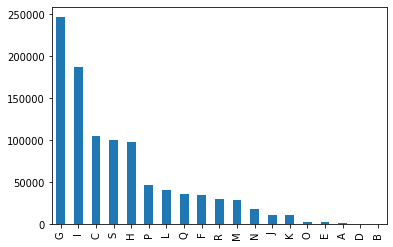

In [ ]:
df_train['digit_1'].value_counts().plot(kind='bar') # 불균형한 데이터

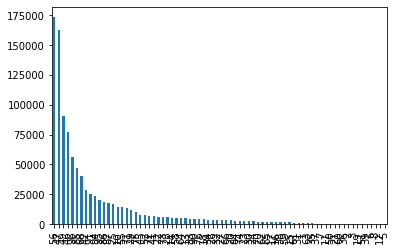

In [ ]:
df_train['digit_2'].value_counts().plot(kind='bar') # 불균형한 데이터

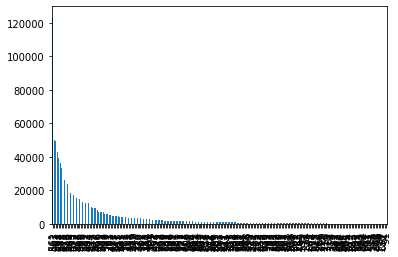

In [ ]:
df_train['digit_3'].value_counts().plot(kind='bar') # 불균형한 데이터

스케일 조정은 나중에... 대강 돌아가는 모델 윤곽을 잡아둔 뒤 하기로

## **토큰화**

In [ ]:
# 필요없는 조사 삭제
from konlpy.tag import Okt

okt_tag = Okt()
# def preprocessing(text, okt):
#     # review : 전처리할 텍스트
#     # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
#     word_text = okt.noun(text, stem=True)
#     return word_text

In [ ]:
def okt_tokenizer(text):
  return okt_tag.nouns(text)

In [ ]:
obj_train, mthd_train, deal_train = [], [], []
for i in range(len(df_train)):
 obj_train.append(okt_tokenizer(df_train['text_obj'][i]))
 mthd_train.append(okt_tokenizer(df_train['text_mthd'][i]))
 deal_train.append(okt_tokenizer(df_train['text_deal'][i]))

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(obj_train)
obj_train_encoded = tokenizer.texts_to_sequences(obj_train)
# print(obj_train_encoded[:5])

In [ ]:
digit_1_train = df_train['digit_1'].values

#**모델링**


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

### 파라미터 세팅

In [ ]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = len(obj_train_encoded)

kargs={'model_name': model_name, 'vocab_size': len(obj_train), 'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

### CNN 모델링

In [ ]:
# CNN model
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

### 적용

In [ ]:
model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
model.fit(obj_train_encoded, digit_1_train, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT)

In [ ]:
history.predict(df_test['digit_1'])

NameError: ignored

## 평가

In [ ]:
model.evaluate(test_input, df_test['digit_1'])

NameError: ignored

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV

# okt_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
#              'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#              'logisticregression__C': [0.1, 1, 10]}
# okt_pipe = make_pipeline(obj_train_encoded[0:1000],
#                          LogisticRegression(solver='liblinear'))
# okt_grid = GridSearchCV(okt_pipe, okt_param_grid,cv=3)

# # 그리드 서치 수행
# okt_grid.fit(obj_train_encoded[0:1000], digit_1_train[0:1000])
# print("최상의 교차 검증 점수: {:.3f}".format(okt_grid.best_score_[1000]))
# print("최적의 교차 검증 매개변수: ".format(okt_grid.best_params_[1000]))

TypeError: ignored

In [ ]:
for i in range(len(X_data)):
  X_data[i] = preprocessing(X_data[i])

In [ ]:
# BOW는 단어의 순서를 고려하지 않고 단어의 빈도만 고려한다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

In [ ]:
word_to_index = tokenizer.word_index
print(word_to_index)

In [ ]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

In [ ]:
print('최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=30)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
# 이거 결과가 이상한데?

In [ ]:
# RNN으로 분류하기(조금 더 복잡한 문장에서 좋을듯)
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4


ValueError: ignored

In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

NameError: ignored

In [ ]:
# # 토큰화
# X_train = df_train
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# X_train_encoded = tokenizer.texts_to_sequences(X_train)
# print(X_train_encoded[:5])

NameError: ignored

In [ ]:
# digit_3 값을 예측한 뒤 뒤의 숫자 하나를 제거해서 digit_2를 설정해주고 범위에 따라 digit_1를 나누면 완성

# **참조 링크**
okt https://wikidocs.net/book/2155

CNN https://wonhwa.tistory.com/35